Find articles that made it to certain journals and compare key words.

In [81]:
#Need to add parent directoy to sys.path to find 'metadataDB'
import sys
sys.path.append('../')

%matplotlib inline
import matplotlib.pyplot as plt 
import time
import numpy as np

# Natural language processing toolkit
# To use this, run nltk.download() and download 'stopwords'
from nltk.corpus import stopwords
s=stopwords.words('english') + ['']

# SQL
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from metadataDB.declareDatabase import *
from sqlalchemy import or_

engine = create_engine("sqlite:///../arXiv_metadata.db", echo=False)
Base.metadata.bind = engine
DBsession = sessionmaker(bind=engine)
session = DBsession()

In [2]:
query = session.query(Article).filter(or_(Article.journal_ref.like('Physics Review Letters%'),
                                          Article.journal_ref.like('Phys. Rev. Lett.%'),
                                          Article.journal_ref.like('PRL%'),
                                          ))
# query = session.query(Article).filter(Article.journal_ref.like('PRL%'))
resultPRL = query.all()

In [3]:
query = session.query(Article).filter(or_(Article.journal_ref.like('Nature%'),
                                          Article.journal_ref.like('Nat.%'),
                                          Article.journal_ref.like('Science%')))
# query = session.query(Article).filter(Article.journal_ref.like('PRL%'))
resultNatureScience = query.all()

In [118]:
abstract = dict()
abstractPRL = dict()

numWords = 0
numAbstracts = len(resultPRL)

start = time.time()
for item in resultPRL:
#     print item.abstract
    for word in set((item.abstract).replace('\n',' ') \
                                   .replace('\\','') \
                                   .replace('(','') \
                                   .replace(')','') \
                                   .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
            if word in abstractPRL.keys():
                abstractPRL[word] += 1
            else:
                abstractPRL[word] =1
            if word in abstract.keys():
                abstract[word] -= 1./numAbstracts
            else:
                abstract[word] = -1./numAbstracts
            numWords += 1

total_time = time.time() - start
print "%f sec., %i abstracts, %i words" % (total_time, numAbstracts, numWords)
print "%0.0f abstracts per second" % (numAbstracts/total_time)
print "%0.0f words per second" % (numWords/total_time)

76.333514 sec., 3652 abstracts, 142236 words
48 abstracts per second
1863 words per second


In [119]:
abstractNature = dict()
titleNature = dict()

numWords = 0
numAbstracts = len(resultNatureScience)

start = time.time()
for item in resultNatureScience:
#     print item.abstract
    for word in set((item.abstract).replace('\n',' ') \
                                   .replace('\\','') \
                                   .replace('(','') \
                                   .replace(')','') \
                                   .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
            if word in abstractNature.keys():
                abstractNature[word] += 1
            else:
                abstractNature[word] =1
            if word in abstract.keys():
                abstract[word] += 1./numAbstracts
            else:
                abstract[word] = 1./numAbstracts
        numWords += 1

total_time = time.time() - start
print "%f sec., %i abstracts, %i words" % (total_time, numAbstracts, numWords)
print "%0.0f abstracts per second" % (numAbstracts/total_time)
print "%0.0f words per second" % (numWords/total_time)

24.557072 sec., 630 abstracts, 63640 words
26 abstracts per second
2592 words per second


In [120]:
# Want to sort dictionary by values. Convert it to a list of tuples so we can use python's sort functions
wordslist = sorted([(key, val) for key, val in abstract.iteritems()], key=lambda x: x[1])

In [121]:
words_best_and_worst = wordslist[0:10] + wordslist[-11:-1]
print words_best_and_worst

[(u'study', -0.0868026217423821), (u'model', -0.06971870164641344), (u'find', -0.04759470783567195), (u'numerical', -0.03993549957405402), (u'finite', -0.03638015264521304), (u'behavior', -0.03600375528086367), (u'investigate', -0.034245205931953085), (u'consider', -0.03319251030094417), (u'leads', -0.031832090265825404), (u'dependence', -0.031404405500791044), (u'discovery', 0.07399989568664267), (u'observations', 0.076785062327231), (u'quantum', 0.07694500947512402), (u'stars', 0.07854361167614177), (u'information', 0.08410525217754118), (u'high', 0.09032145899615784), (u'may', 0.09104469827361367), (u'many', 0.0928162867921903), (u'matter', 0.11422573410525204), (u'new', 0.12026634677237066)]


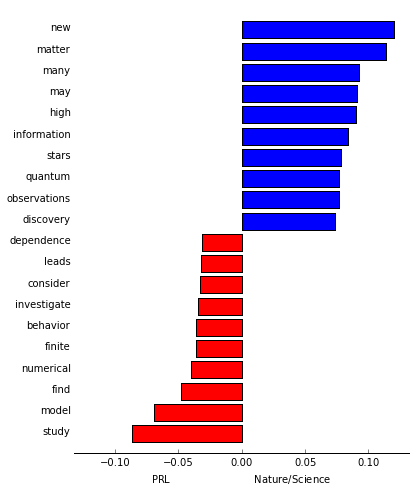

In [122]:
words = [x for (x,y) in words_best_and_worst]
vals = np.array([y for (x,y) in words_best_and_worst])


ind = np.arange(0, len(words))
c = ['b' if x > 0 else 'r' for x in vals]

plt.figure(frameon=False, figsize=(6,8))
plt.barh(ind - 0.5,
         vals,
         color=c)
plt.yticks(ind, words)
plt.ylim(ind[0]-1, ind[-1]+1)
plt.xlim(-1.1*np.max(np.abs(vals)), 1.1*np.max(np.abs(vals)))
plt.xlabel('PRL$\qquad\qquad\qquad$Nature/Science')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('none')

In [ ]:
session.close()